# Impacto de la deforestación en el regimen de caudales de los rios en Colombia (TEAM 28)

## EDA - Describe, NaN, GeoMaps

### Librerias

In [1]:
import numpy as np 
import pandas as pd

import geopandas as gpd
import geoplot as geop
import descartes as dsc

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Files reading

In [2]:
fp = '../data/shapes/Basins_Colombia.shp'
data_geo = gpd.read_file(fp, encoding = 'utf-8')

fp_est = '../data/shapes/CNE_IDEAM CNE.shp'
data_geo_est = gpd.read_file(fp_est, encoding = 'utf-8')

In [3]:
print('Tipo de objeto cuencas : ', type(data_geo), '\n')
print('Tamaño del objeto cuencas: ', data_geo.shape, '\n')
print('Columnas del objeto cuencas: ', data_geo.columns, '\n')
print(data_geo.head)

print('Tipo de objeto estaciones: ', type(data_geo_est), '\n')
print('Tamaño del objeto estaciones: ', data_geo_est.shape, '\n')
print('Columnas del objeto estaciones: ', data_geo_est.columns, '\n')
print(data_geo_est.head)

Tipo de objeto cuencas :  <class 'geopandas.geodataframe.GeoDataFrame'> 

Tamaño del objeto cuencas:  (316, 11) 

Columnas del objeto cuencas:  Index(['cod_ah', 'cod_szh', 'cod_zh', 'nom_ah', 'nom_szh', 'nom_zh',
       'objectid_1', 'ruleid', 'shape_area', 'shape_leng', 'geometry'],
      dtype='object') 

<bound method NDFrame.head of      cod_ah  cod_szh  cod_zh           nom_ah  \
0       1.0   1701.0    17.0           Caribe   
1       1.0   1702.0    17.0           Caribe   
2       1.0   1703.0    17.0           Caribe   
3       2.0   2602.0    26.0  Magdalena Cauca   
4       2.0   2632.0    26.0  Magdalena Cauca   
..      ...      ...     ...              ...   
311     3.0   3516.0    35.0          Orinoco   
312     1.0   1117.0    11.0           Caribe   
313     1.0   1509.0    15.0           Caribe   
314     5.0   5310.0    53.0         Pacifico   
315     5.0   5309.0    53.0         Pacifico   

                                   nom_szh                     nom_zh  \

In [6]:
print(data_geo_est['CATEGORIA'].unique())

data_geo_est.head(5)

['Limnigráfica' 'Climática Principal' 'Mareográfica' 'Pluviográfica'
 'Climática Ordinaria' 'Agrometeorológica' 'Limnimétrica' 'Pluviométrica'
 'Meteorológica Especial' 'Sinóptica Principal' 'Sinóptica Secundaria'
 'Radio Sonda']


,OBJECTID,CODIGO,nombre,CATEGORIA,TECNOLOGIA,ESTADO,FECHA_INST,altitud,latitud,longitud,...,MUNICIPIO,AREA_OPERA,AREA_HIDRO,ZONA_HIDRO,observacio,CORRIENTE,FECHA_SUSP,SUBZONA_HI,ENTIDAD,geometry
0,1,52057100,RUMICHACA - AUT [52057100],Limnigráfica,Automática con Telemetría,Activa,2016/11/15 00:00:00.000,2582,0.813786,-77.661978,...,Ipiales,Area Operativa 07 - Nariño-Putumayo,Pacifico,Patía,None,Guaitara,None,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,POINT Z (-77.66198 0.81379 2582.00000)
1,2,52055170,LA JOSEFINA - AUT [52055170],Climática Principal,Automática con Telemetría,Activa,2005/12/10 00:00:00.000,2450,0.930306,-77.491194,...,Contadero,Area Operativa 07 - Nariño-Putumayo,Pacifico,Patía,None,Guaitara,None,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,POINT Z (-77.49119 0.93031 2450.00000)
2,3,52055220,EL PARAISO - AUT [52055220],Climática Principal,Automática con Telemetría,Activa,2004/03/01 00:00:00.000,3120,1.070611,-77.636889,...,Túquerres,Area Operativa 07 - Nariño-Putumayo,Pacifico,Patía,None,Guaitara,None,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,POINT Z (-77.63689 1.07061 3120.00000)
3,4,44015070,EL PEPINO - AUT [44015070],Climática Principal,Automática con Telemetría,Activa,2005/11/11 00:00:00.000,760,1.082889,-76.667111,...,Mocoa,Area Operativa 07 - Nariño-Putumayo,Amazonas,Caquetá,None,Guaitara,None,Alto Caqueta,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,POINT Z (-76.66711 1.08289 760.00000)
4,5,48015040,PUERTO NARINO - AUT [48015040],Climática Principal,Automática con Telemetría,Activa,2005/07/19 00:00:00.000,158,-3.780306,-70.362639,...,Puerto Nariño,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Amazonas,Amazonas - Directos,None,Amazonas,None,Directos Río Amazonas (mi),INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,POINT Z (-70.36264 -3.78031 158.00000)


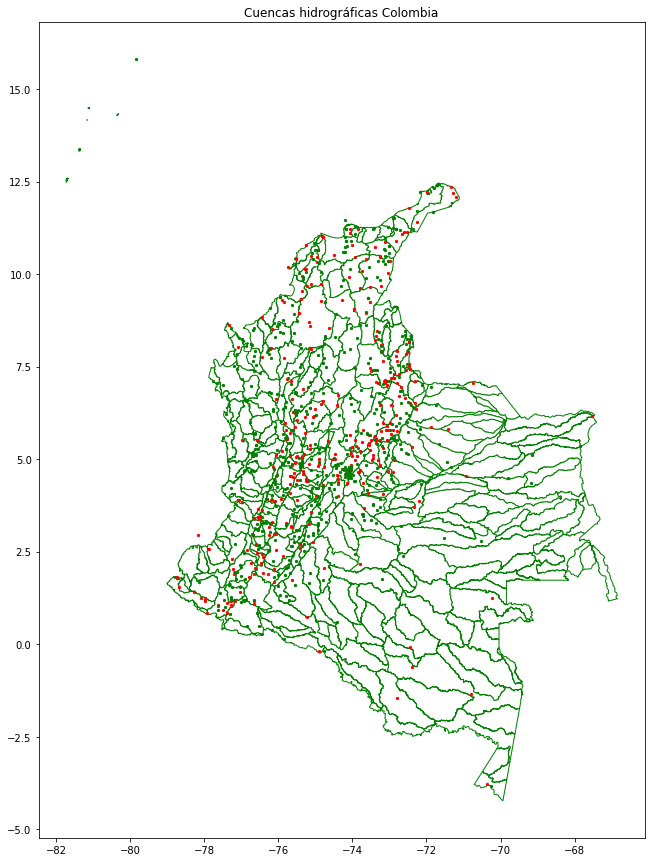

In [7]:
#fig, ax = plt.subplots(figsize=(10,10))
#mapa = data_geo.plot(ax = ax)

data_geo_est_climappal = data_geo_est[data_geo_est['CATEGORIA'] == 'Climática Principal'].reset_index()
data_geo_est_climaord = data_geo_est[data_geo_est['CATEGORIA'] == 'Climática Ordinaria'].reset_index()
data_geo_est_lmm = data_geo_est[data_geo_est['CATEGORIA'] == 'Limnimétrica'].reset_index()
data_geo_est_lmg = data_geo_est[data_geo_est['CATEGORIA'] == 'Limnigráfica'].reset_index()
data_geo_est_plm = data_geo_est[data_geo_est['CATEGORIA'] == 'Pluviométrica'].reset_index()
data_geo_est_plg = data_geo_est[data_geo_est['CATEGORIA'] == 'Pluviográfica'].reset_index()

fig, ax = plt.subplots(figsize=(15,15))
ax.set_title('Cuencas hidrográficas Colombia')
mapa_base = data_geo.plot(ax = ax, color = 'white', edgecolor='green')
mapa_base = data_geo_est_climappal.plot(ax = mapa_base, marker = 'o', color = 'red', markersize = 5)
mapa_final = data_geo_est_climaord.plot(ax = mapa_base, marker = 'o', color = 'blue', markersize = 5)
mapa_final = data_geo_est_climaord.plot(ax = mapa_base, marker = 'o', color = 'blue', markersize = 5)



